<a href="https://colab.research.google.com/github/taegyunjjang/ml_study/blob/main/2_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import warnings

plt.rcParams['figure.figsize'] = [5, 4]
sns.set(style='whitegrid')
sns.set_palette('pastel')
warnings.filterwarnings('ignore')

In [30]:
# 한글이 깨지는 경우
from matplotlib import font_manager, rc
import matplotlib
import platform

if platform.system() == 'Windows':
  # 윈도우인 경우
  font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
  rc('font', family=font_name)
# else:
#   # Mac인 경우
#   rc('font', family='AppleGothic')

matplotlib.rcParams['axes.unicode_minus'] = False

In [31]:
# Loading 'Tips' dataset from seaborn
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [32]:
tips.shape

(244, 7)

In [33]:
# matplotlib을 활용한 시각화
sum_tip_by_day = tips.groupby('day')['tip'].sum()
sum_tip_by_day

day
Thur    171.83
Fri      51.96
Sat     260.40
Sun     247.39
Name: tip, dtype: float64

In [34]:
x_label = ['Thu', 'Fri', 'Sat', 'Sun']
x_label_index = np.arange(len(x_label))
x_label_index

array([0, 1, 2, 3])

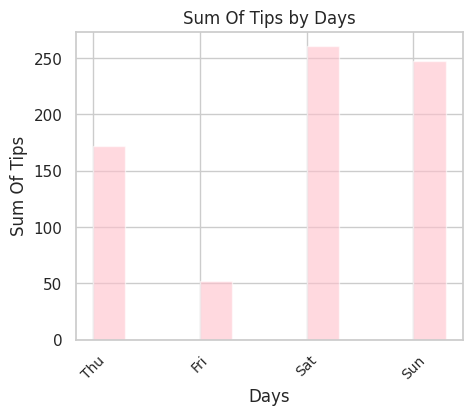

In [35]:
# Bar 차트 이해 및 제작
plt.bar(x_label, sum_tip_by_day,
        color='pink', # 색 지정
        alpha=0.6,    # 투명도
        width=0.3,    # 너비
        align='edge') # 배치
plt.title('Sum Of Tips by Days')
plt.xlabel('Days', fontsize=12)
plt.ylabel('Sum Of Tips', fontsize=12)
plt.xticks(x_label_index,
           x_label,
           rotation=45,
           fontsize=10)
plt.show()

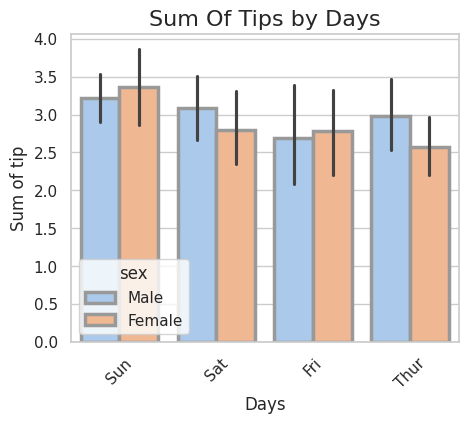

In [36]:
# seaborn을 활용한 시각화
sns.barplot(data=tips,      # 데이터 프레임
            x='day',        # x 변수
            y='tip',        # y 변수
            estimator=np.average,
            hue='sex',      # 색깔 구분으로 특정 컬럼값을 비교
            order=['Sun', 'Sat', 'Fri', 'Thur'],  # x ticks 순서
            edgecolor='.6', # 바 모서리 선명도
            linewidth=2.5)   # 모서리 두께
plt.title('Sum Of Tips by Days', fontsize=16)
plt.xlabel('Days')
plt.ylabel('Sum of tip')
plt.xticks(rotation=45)
plt.show()

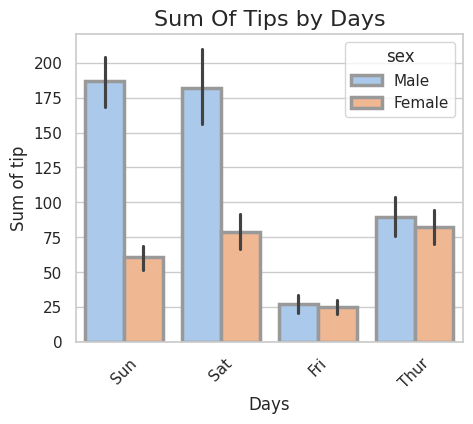

In [37]:
# seaborn을 활용한 시각화
sns.barplot(data=tips,      # 데이터 프레임
            x='day',        # x 변수
            y='tip',        # y 변수
            estimator=np.sum,
            hue='sex',      # 색깔 구분으로 특정 컬럼값을 비교
            order=['Sun', 'Sat', 'Fri', 'Thur'],  # x ticks 순서
            edgecolor='.6', # 바 모서리 선명도
            linewidth=2.5)   # 모서리 두께
plt.title('Sum Of Tips by Days', fontsize=16)
plt.xlabel('Days')
plt.ylabel('Sum of tip')
plt.xticks(rotation=45)
plt.show()

In [38]:
# Pie 차트 이해 및 제작
# matplotlib을 활용한 시각화
sum_tip_by_day = tips.groupby('day')['tip'].sum()
ratio_tip_by_day = sum_tip_by_day/sum_tip_by_day.sum()

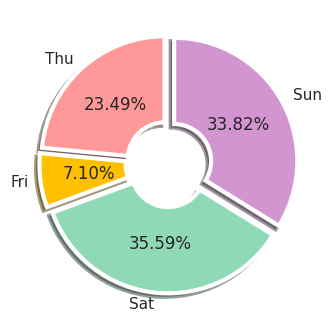

In [39]:
x_labe1 = ['Thu', 'Fri', 'Sat', 'Sun']

plt.pie(ratio_tip_by_day,                 # 비율값
        labels=x_label,                   # 라벨값
        autopct='%.2f%%',                 # 부채꼴 안에 표시될 숫자 형식(소수점 2자리까지 표시)
        startangle=90,                    # 축이 시작되는 각도 설정
        counterclock=True,                # True : 반시계 방향, False : 시계 방향
        explode=[0.05, 0.05, 0.05, 0.05], # 중심에서 벗어나는 정도
        shadow=True,                      # 그림자 표시
        colors=['#ff9999', '#ffc000', '#8fd9b6', '#d395d0'],
        wedgeprops={'width':0.7, 'edgecolor': 'w', 'linewidth':3})  # 도넛 차트를 그릴 때 사용
plt.show()

In [40]:
# Line 차트 이해 및 제작

# matplotlib을 활용해서 시각화

# line 차트 예제를 위해, tips 데이터에 가상 시간 컬럼 추가하기
# 일요일 데이터만 사용
sun_tips = tips[tips['day'] == 'Sun']
sun_tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
186,20.90,3.50,Female,Yes,Sun,Dinner,3
187,30.46,2.00,Male,Yes,Sun,Dinner,5
188,18.15,3.50,Female,Yes,Sun,Dinner,3
189,23.10,4.00,Male,Yes,Sun,Dinner,3


In [41]:
# 현재 서버 시간을 얻기 위해 datetime 라이브러리 사용

import datetime
date = []
today = datetime.date.today()
date.append(today)

for i in range(sun_tips.shape[0] - 1):
  today += datetime.timedelta(1)  # 하루씩 추가
  date.append(today)

In [42]:
sun_tips['date'] = date
sun_tips

,total_bill,tip,sex,smoker,day,time,size,date
0,16.99,1.01,Female,No,Sun,Dinner,2,2024-01-27
1,10.34,1.66,Male,No,Sun,Dinner,3,2024-01-28
2,21.01,3.50,Male,No,Sun,Dinner,3,2024-01-29
3,23.68,3.31,Male,No,Sun,Dinner,2,2024-01-30
4,24.59,3.61,Female,No,Sun,Dinner,4,2024-01-31
...,...,...,...,...,...,...,...,...
186,20.90,3.50,Female,Yes,Sun,Dinner,3,2024-04-07
187,30.46,2.00,Male,Yes,Sun,Dinner,5,2024-04-08
188,18.15,3.50,Female,Yes,Sun,Dinner,3,2024-04-09
189,23.10,4.00,Male,Yes,Sun,Dinner,3,2024-04-10


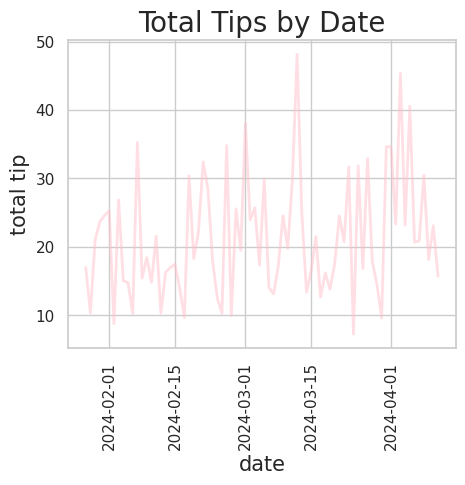

In [43]:
plt.plot(sun_tips['date'], sun_tips['total_bill'],
         linestyle='-', # 라인 모양
         linewidth=2,   # 라인 두께
         color='pink',  # 색상
         alpha=0.5)     # 투명도
plt.title('Total Tips by Date', fontsize=20)
plt.xlabel('date', fontsize=15)
plt.ylabel('total tip', fontsize=15)
plt.xticks(rotation=90)
plt.show()

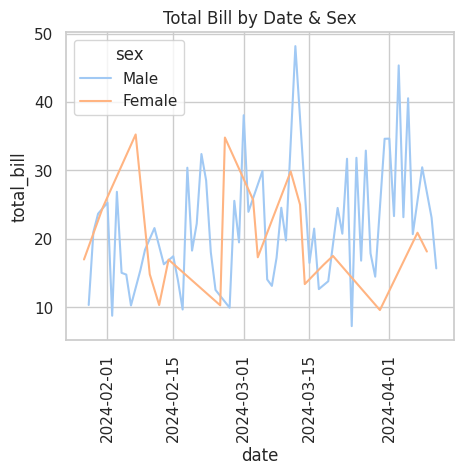

In [44]:
# seaborn을 활용한 시각화
sns.lineplot(data=sun_tips,
             x='date',
             y='total_bill',
             hue='sex')
plt.title('Total Bill by Date & Sex')
plt.xticks(rotation=90)
plt.show()

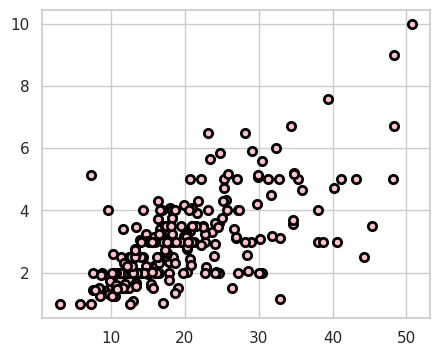

In [45]:
# Scatter 차트 이해 및 제작

# matplotlib을 활용한 시각화
plt.scatter(tips['total_bill'], tips['tip'],
            color='pink',
            edgecolor='black',
            linewidth=2)
plt.show()

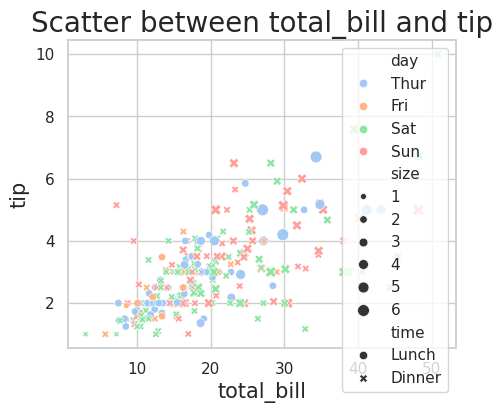

In [46]:
# seaborn을 활용한 시각화
sns.scatterplot(data=tips,
                x='total_bill',
                y='tip',
                style='time', # 모양 구분으로 다른 변수와 비교
                hue='day',
                size='size',  # 크기 구분으로 다른 변수와 비교
                )
plt.title('Scatter between total_bill and tip', fontsize=20)
plt.xlabel('total_bill', fontsize=15)
plt.ylabel('tip', fontsize=15)
plt.show()

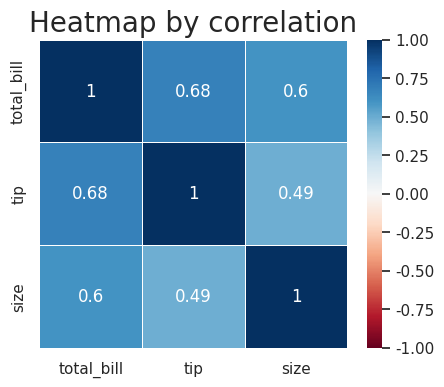

In [47]:
# Heat Map 차트 이해 및 제작

# seaborn을 활용한 시각화
sns.heatmap(tips.corr(),
            annot=True,       # 박스 안 corr 값 표시 여부
            square=True,      # 박스 모양 정사각형 결정
            vmin=-1, vmax=1,  # 최소, 최대값 지정
            linewidth=.5 ,
            cmap='RdBu'       # 색상 선택
            )
plt.title('Heatmap by correlation', fontsize=20)
plt.show()

In [48]:
tips.corr() # 연속형 변수만 처리

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


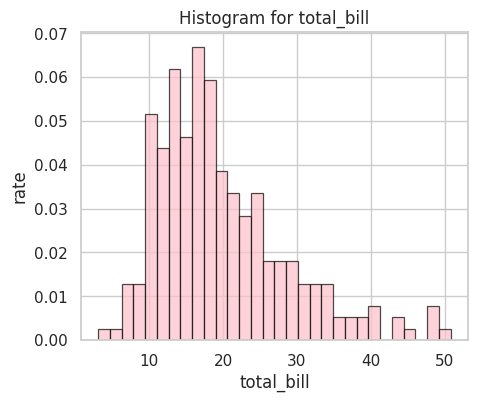

In [49]:
# Histogram 차트 이해 및 제작
# matplotlib을 활용한 시각화

plt.hist(tips['total_bill'],
         bins=30,
         density=True,
         alpha=.7,
         color='pink',
         edgecolor='black',
         linewidth=.9
         )
plt.title('Histogram for total_bill')
plt.xlabel('total_bill')
plt.ylabel('rate')
plt.show()

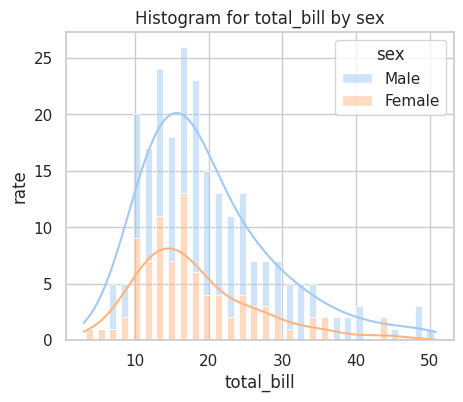

In [50]:
# seaborn을 활용한 시각화

sns.histplot(data=tips,
             x='total_bill',
             bins=30,
             kde=True,
             hue='sex',
             multiple='stack',
             shrink=.6
             )
plt.title('Histogram for total_bill by sex')
plt.xlabel('total_bill')
plt.ylabel('rate')
plt.show()

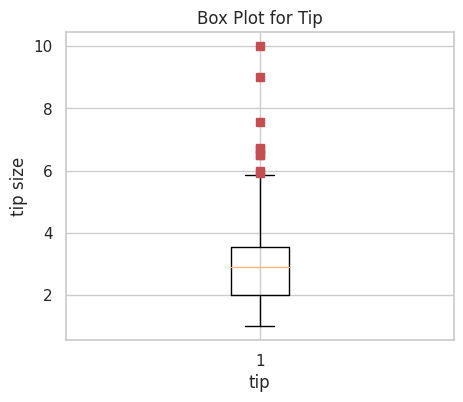

In [51]:
# Box 차트 이해 및 제작

# matplotlib을 활용한 시각화
plt.boxplot(tips['tip'],
            sym='rs')
plt.title('Box Plot for Tip')
plt.xlabel('tip')
plt.ylabel('tip size')
plt.show()

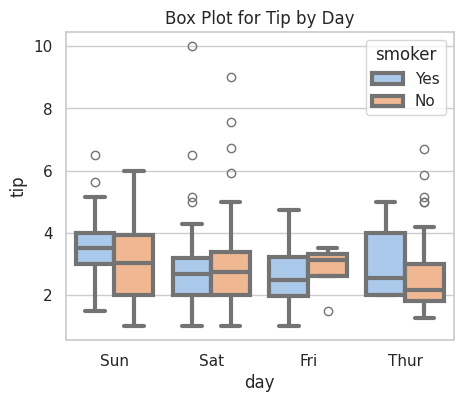

In [52]:
# seaborn을 활용한 시각화
sns.boxplot(data=tips,
            x='day',
            y='tip',
            hue='smoker',
            linewidth=3,
            order=['Sun', 'Sat', 'Fri', 'Thur'])
plt.title('Box Plot for Tip by Day')
plt.ylabel('tip')
plt.show()